# 오버워치 2 점수판 분석 AI

In [1]:
import pandas as pd
from os import path
import joblib

players = 10


def prepare_scoreboards(defeat_, victory_):
    scoreboards_ = pd.concat([defeat_, victory_])
    scoreboards_.set_index(
        pd.Index((i, j) for i in range(len(scoreboards_.index) // players) for j in range(players)), inplace=True
    )
    return scoreboards_


datapath = path.join('datasets', '')
range_ = range(3, 10)
defeat = pd.read_csv(datapath + 'defeat.csv', usecols=range_)
victory = pd.read_csv(datapath + 'victory.csv', usecols=range_)
scoreboards = prepare_scoreboards(defeat, victory)
d_max = scoreboards['D'].max()
joblib.dump(d_max, 'max.joblib')
scoreboards.loc[
    (
            scoreboards['E'] == 0
    ) & (
            scoreboards['A'] == 0
    ) & (
            scoreboards['D'] == 0
    ) & (
            scoreboards['DMG'] == 0
    ) & (
            scoreboards['H'] == 0
    ) & (
            scoreboards['MIT'] == 0
    ), 'D'
] = d_max
scoreboards

E   A   D    DMG      H    MIT    GAME
0   0  24   9   5   9021      0  10517  DEFEAT
    1  17   0  11   7114      0    406  DEFEAT
    2  19   9   8   5749   1336   1266  DEFEAT
    3   7  17  11   1260   8133    237  DEFEAT
    4   9  17  10   1862   8773    113  DEFEAT
...    ..  ..  ..    ...    ...    ...     ...
706 5  13   0  12   7433      0  25710  DEFEAT
    6  26   5   9  12802      0   1493  DEFEAT
    7  18   0  11  12252    222      0  DEFEAT
    8  14  16   8   7399  11002    354  DEFEAT
    9   9  17   5   1908  12424    676  DEFEAT

[7070 rows x 7 columns]

In [2]:
scoreboards.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7070 entries, (0, 0) to (706, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       7070 non-null   int64 
 1   A       7070 non-null   int64 
 2   D       7070 non-null   int64 
 3   DMG     7070 non-null   int64 
 4   H       7070 non-null   int64 
 5   MIT     7070 non-null   int64 
 6   GAME    7070 non-null   object
dtypes: int64(6), object(1)
memory usage: 429.4+ KB


In [3]:
scoreboards.describe()

,E,A,D,DMG,H,MIT
count,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000,7070.000000
mean,14.416124,7.423762,6.569448,6665.238755,3851.176945,2284.150636
std,9.407213,8.211282,3.818921,4440.122738,5042.245720,4418.088946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,4.000000,3163.000000,0.000000,0.000000
50%,13.000000,4.000000,6.000000,6032.500000,705.000000,367.500000
75%,20.000000,12.000000,9.000000,9510.500000,7387.500000,1930.750000
max,58.000000,62.000000,23.000000,29922.000000,26419.000000,41849.000000


In [4]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:' + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

In [5]:
scoreboards

E   A   D    DMG      H    MIT    GAME
0   0  24   9   5   9021      0  10517  DEFEAT
    1  17   0  11   7114      0    406  DEFEAT
    2  19   9   8   5749   1336   1266  DEFEAT
    3   7  17  11   1260   8133    237  DEFEAT
    4   9  17  10   1862   8773    113  DEFEAT
...    ..  ..  ..    ...    ...    ...     ...
706 5  13   0  12   7433      0  25710  DEFEAT
    6  26   5   9  12802      0   1493  DEFEAT
    7  18   0  11  12252    222      0  DEFEAT
    8  14  16   8   7399  11002    354  DEFEAT
    9   9  17   5   1908  12424    676  DEFEAT

[7070 rows x 7 columns]

In [6]:
tank = pd.concat([scoreboards[::players], scoreboards[5::players]])
damage = pd.concat([scoreboards[1::players], scoreboards[2::players], scoreboards[6::players], scoreboards[7::players]])
support = pd.concat(
    [scoreboards[3::players], scoreboards[4::players], scoreboards[8::players], scoreboards[9::players]]
)

In [7]:
tank.describe()

,E,A,D,DMG,H,MIT
count,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000,1414.000000
mean,18.062942,4.340170,6.416549,9618.952617,470.706506,9248.198727
std,9.756244,3.597138,3.691736,4271.814051,1227.801494,5780.863369
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,2.000000,4.000000,6561.000000,0.000000,5081.250000
50%,17.000000,3.000000,6.000000,9199.000000,0.000000,8177.500000
75%,24.000000,6.000000,8.000000,12267.000000,322.000000,12277.500000
max,58.000000,28.000000,23.000000,27480.000000,15168.000000,41849.000000


In [8]:
damage.describe()

,E,A,D,DMG,H,MIT
count,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000
mean,17.641089,1.953324,7.165134,8631.003536,301.226662,583.893918
std,9.083753,2.548839,4.038368,3815.583115,519.830465,1040.001576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,4.000000,5824.250000,0.000000,0.000000
50%,17.000000,1.000000,7.000000,8260.000000,0.000000,84.000000
75%,23.000000,3.000000,10.000000,10970.500000,427.000000,762.750000
max,56.000000,16.000000,23.000000,29922.000000,3353.000000,9682.000000


In [9]:
support.describe()

,E,A,D,DMG,H,MIT
count,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000
mean,9.367751,14.435997,6.050212,3222.617044,9091.362447,502.383310
std,6.974600,8.470749,3.565292,2352.094871,4093.741065,836.047038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,8.000000,4.000000,1539.750000,6134.000000,0.000000
50%,8.000000,14.000000,6.000000,2830.500000,8632.500000,208.500000
75%,14.000000,19.000000,8.000000,4446.000000,11589.250000,656.500000
max,48.000000,62.000000,23.000000,15946.000000,26419.000000,7778.000000


그림 저장:tank_hist


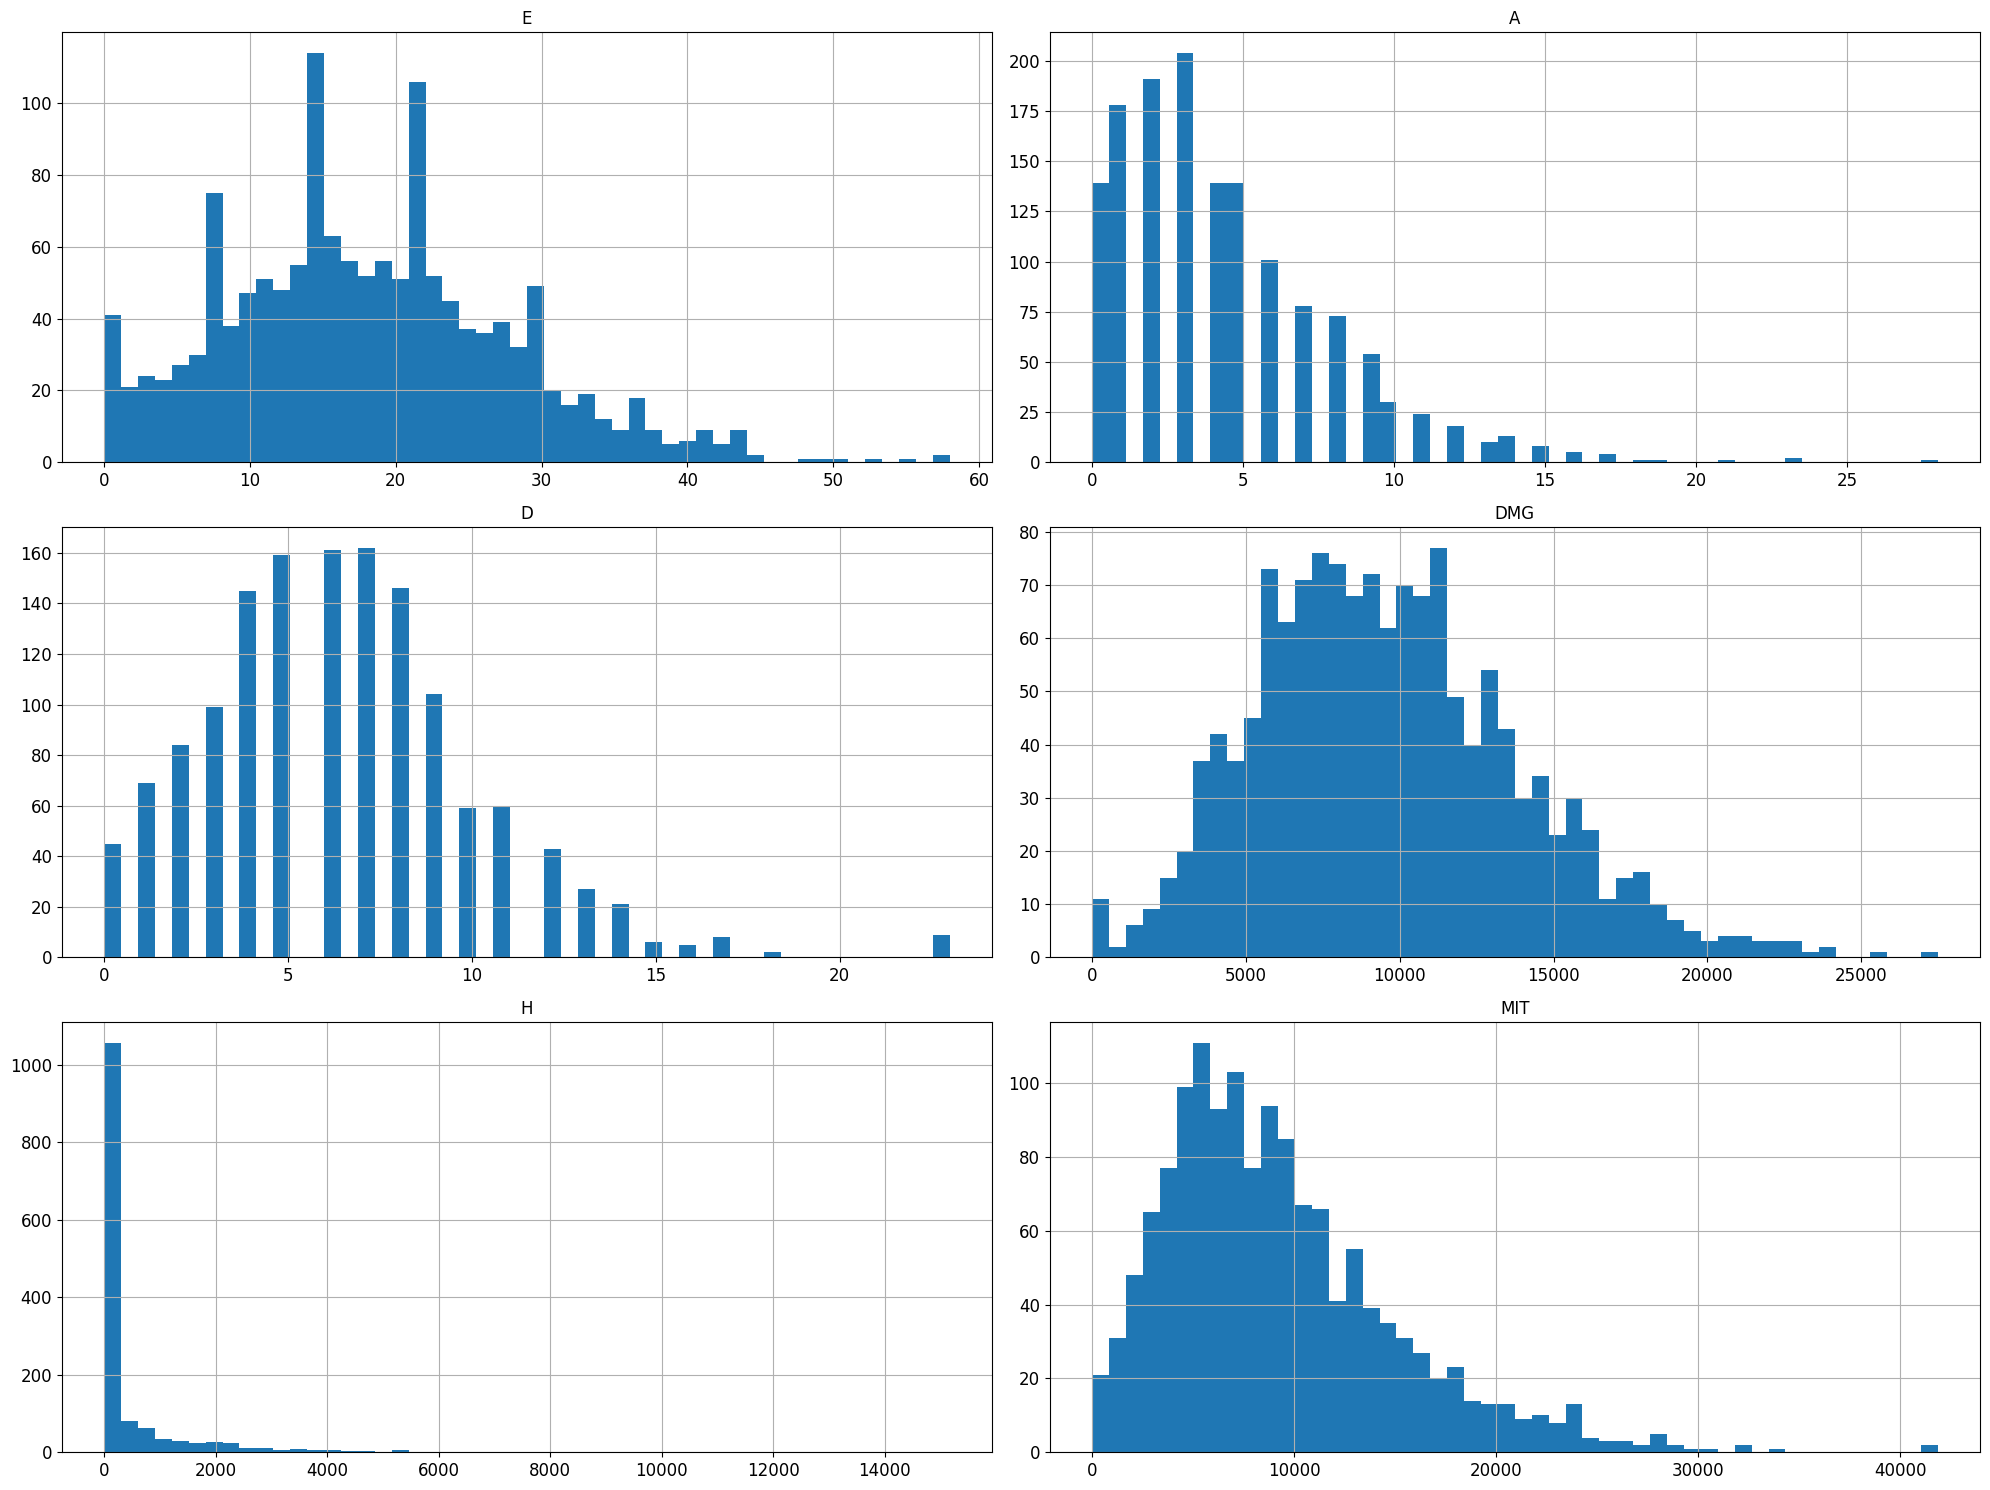

In [10]:
tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장:damage_hist


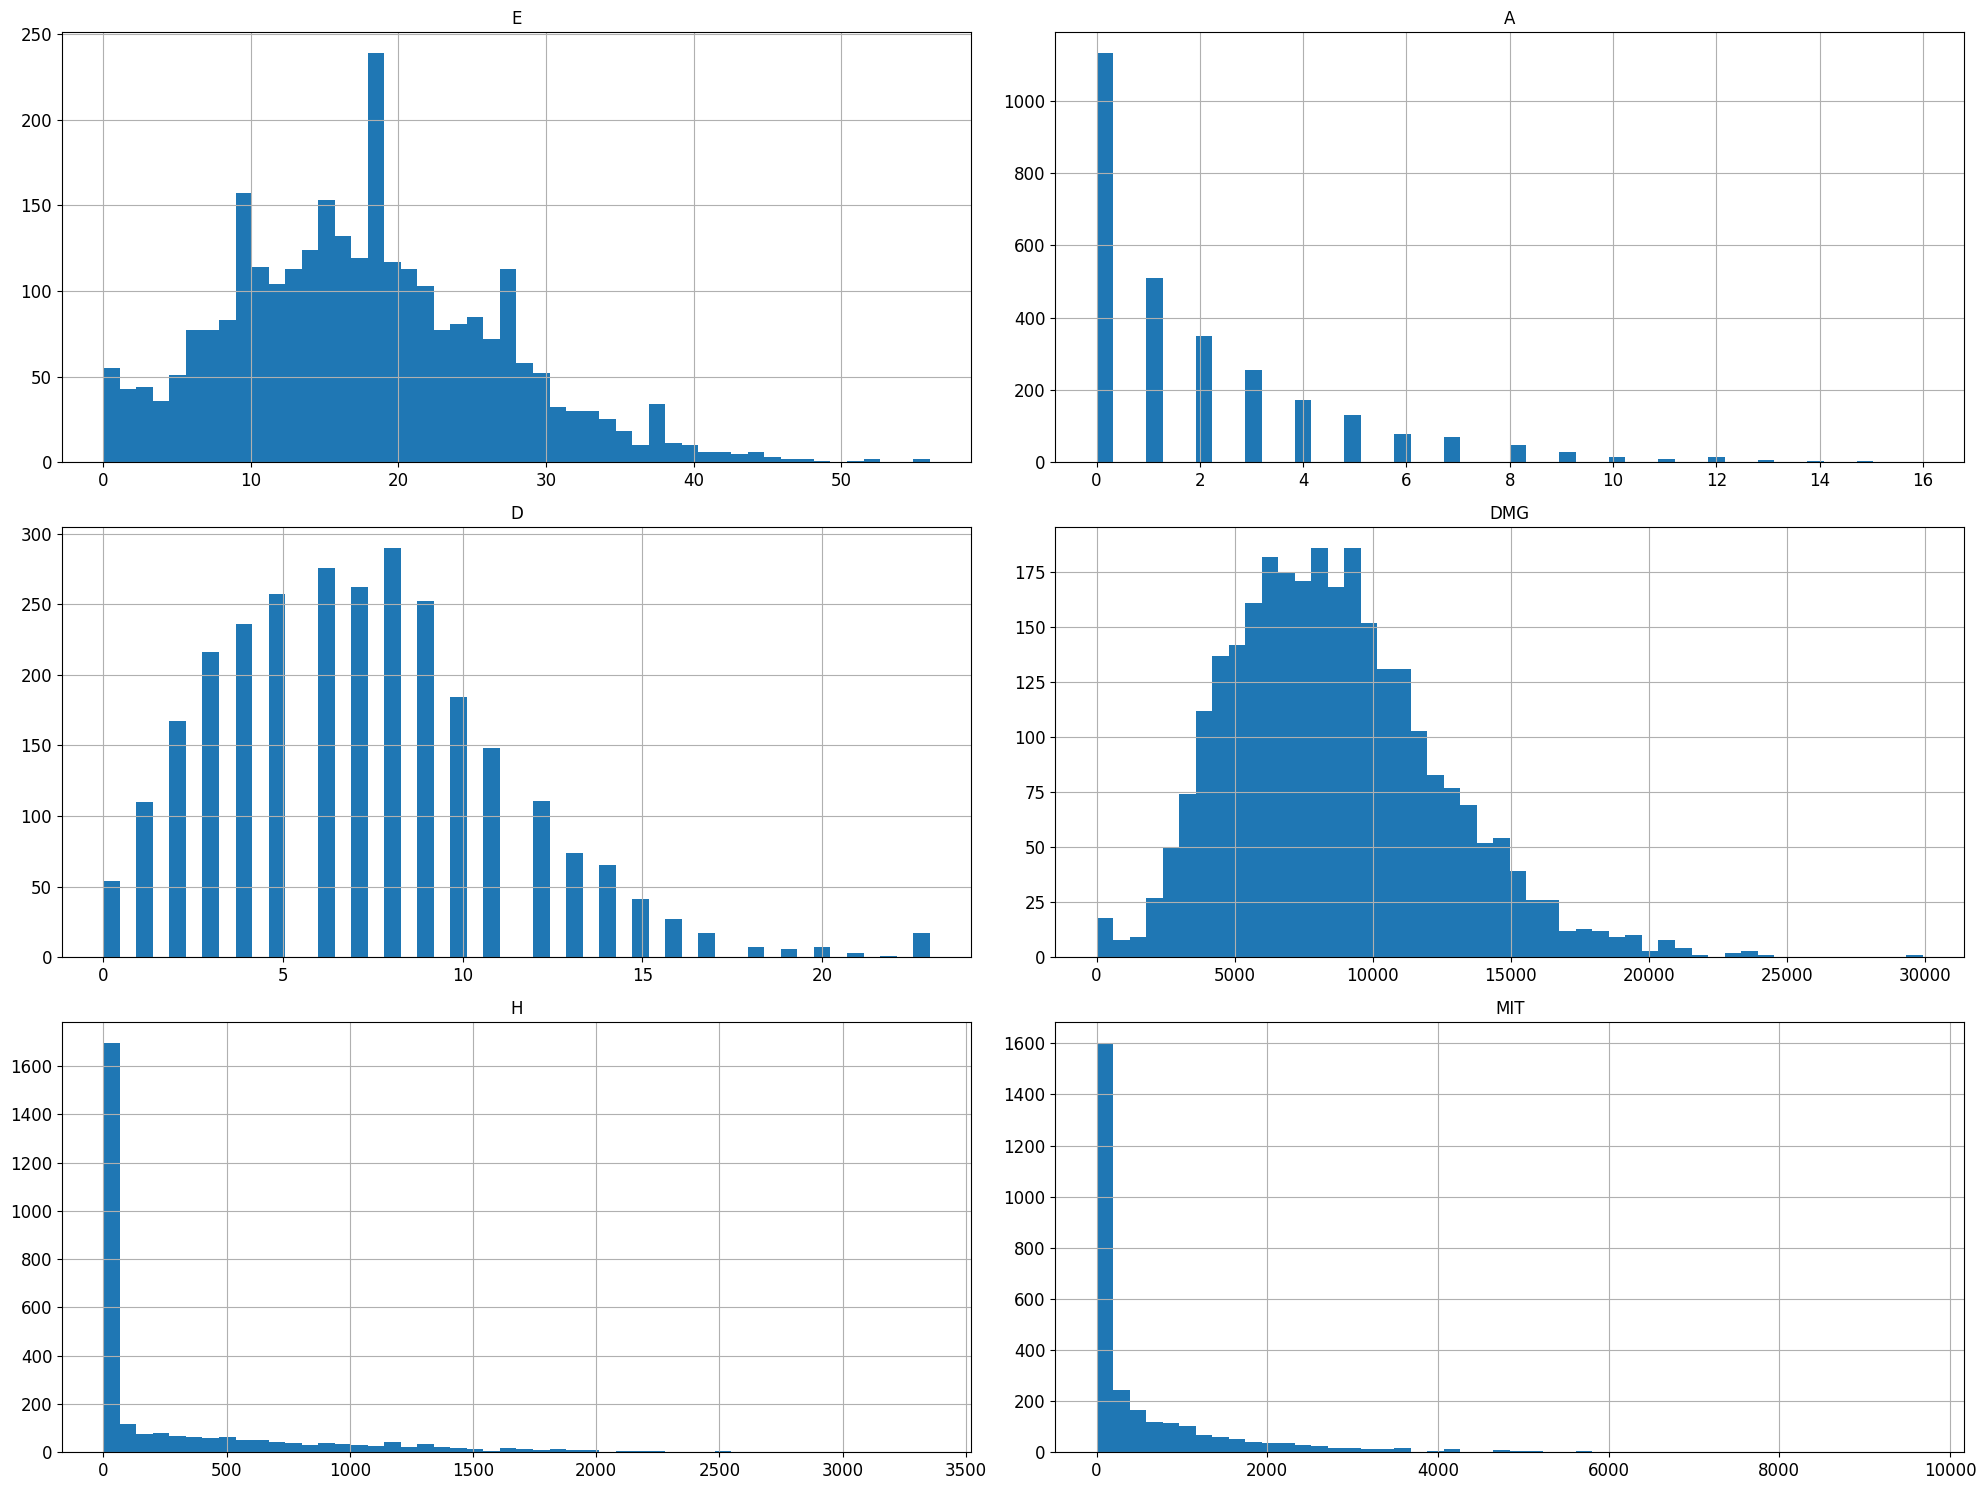

In [11]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장:support_hist


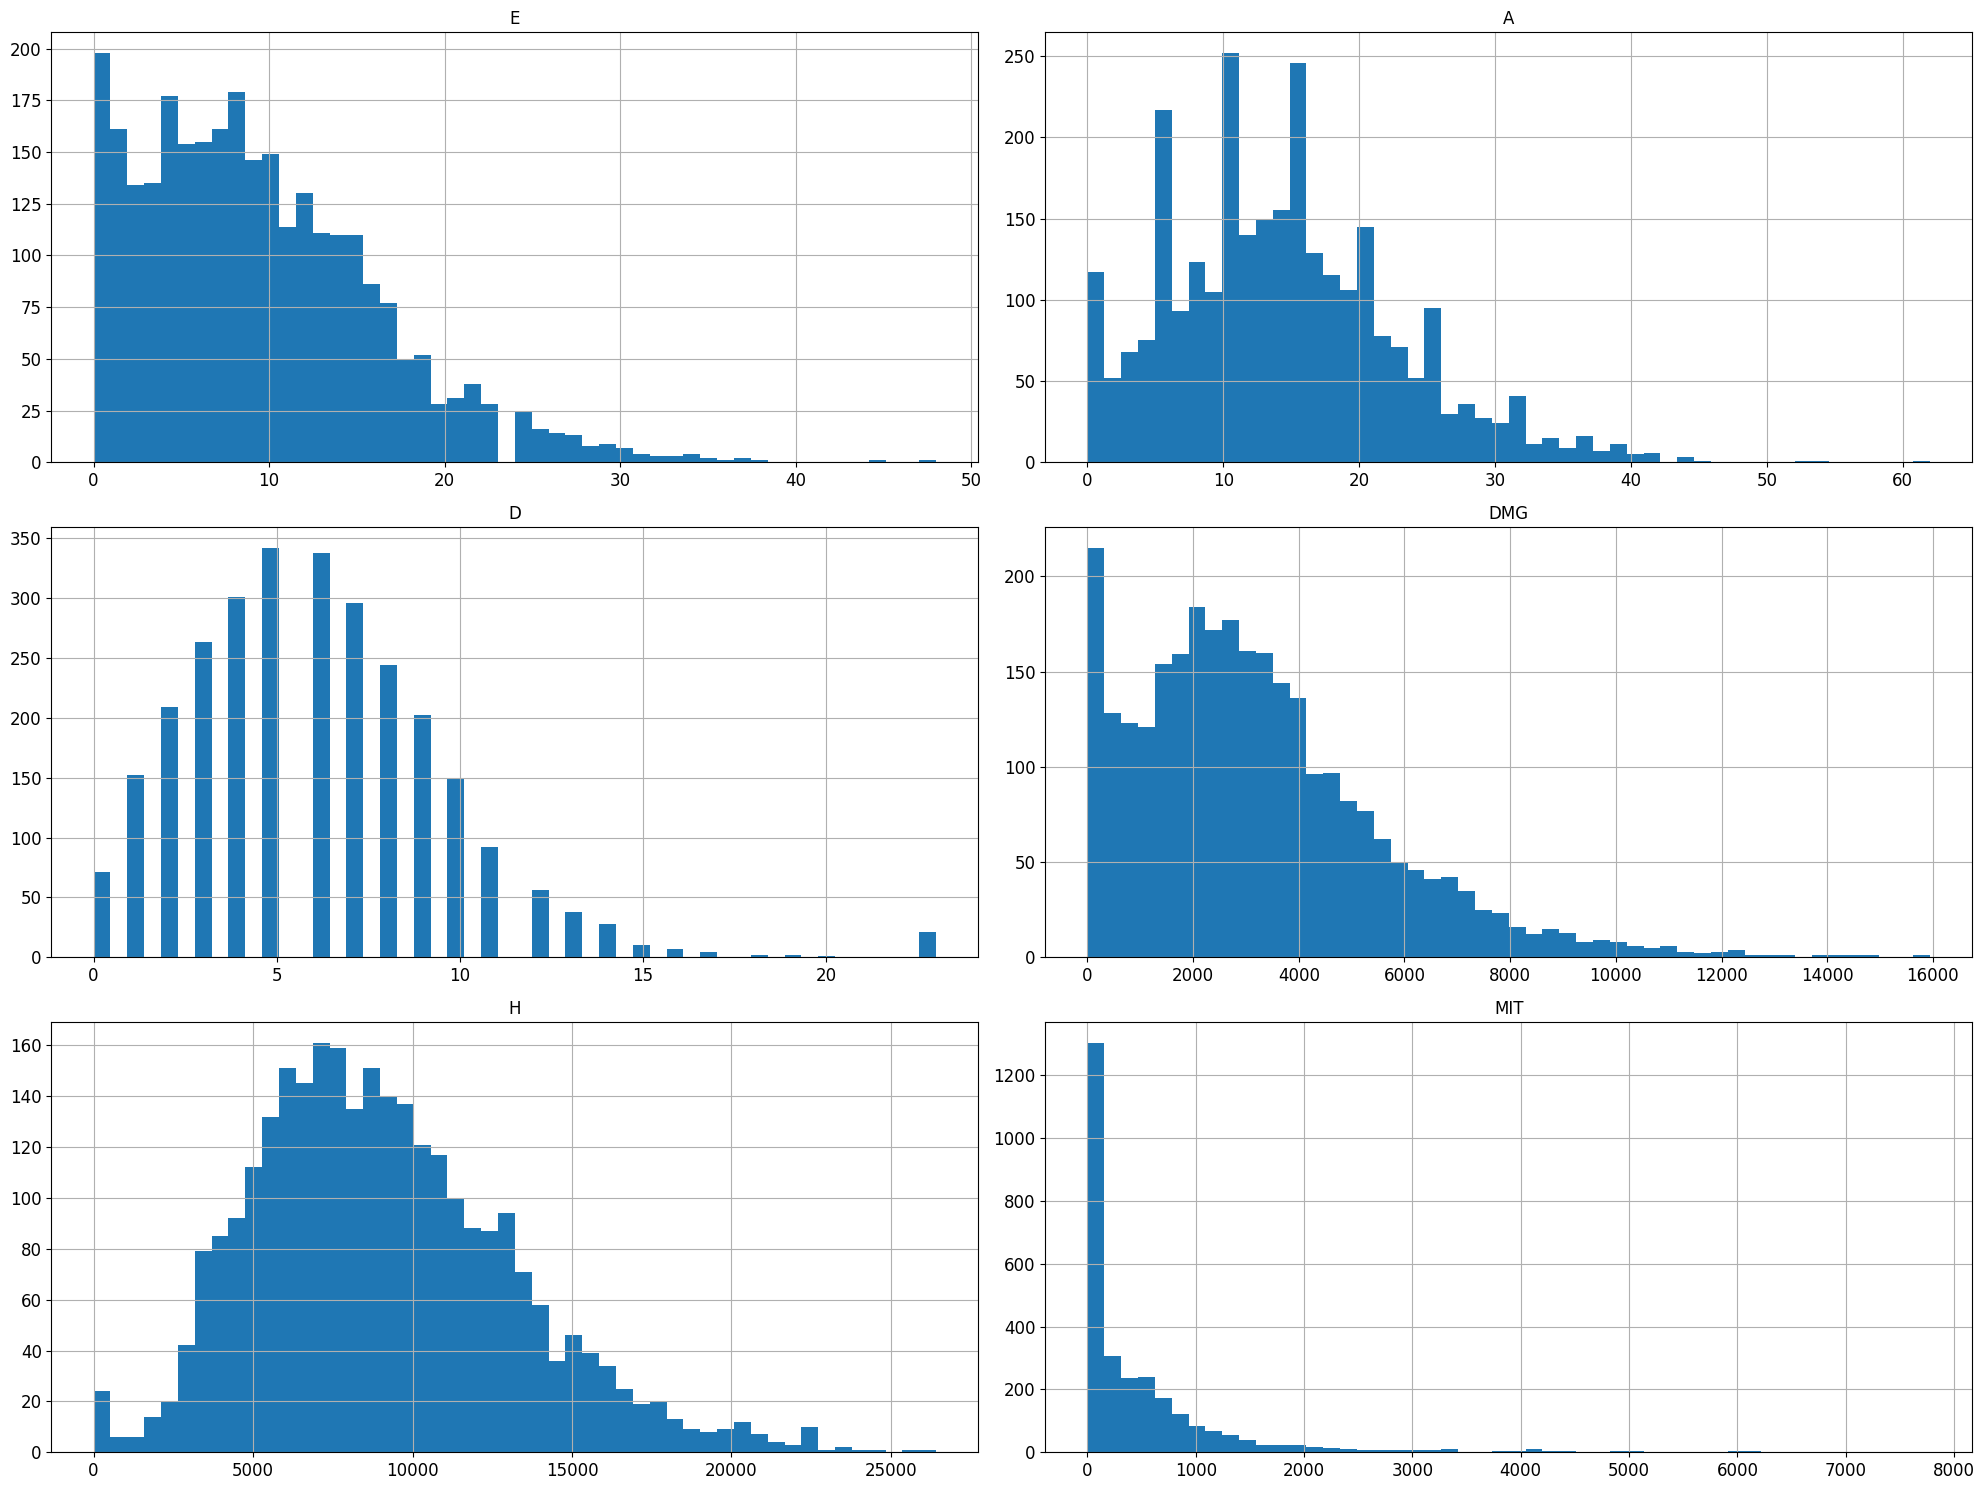

In [12]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [13]:
from sklearn import utils

scoreboards = scoreboards.loc[utils.shuffle(range(len(scoreboards.index) // players))]
scoreboards

E   A   D    DMG      H    MIT     GAME
557 0  18   3   6   6492      0  12112  VICTORY
    1  19   7   2   5982     69   1413  VICTORY
    2  21   2   8   8650    659    386  VICTORY
    3  15   5   4   3288   8106    116  VICTORY
    4  22  12   4   4828   6801    407  VICTORY
...    ..  ..  ..    ...    ...    ...      ...
704 5  24   2   8  14771    462   6449   DEFEAT
    6  24   1  11  14902      0    112   DEFEAT
    7  19   4  10   8296   1036      0   DEFEAT
    8  10  17   8   5757  10761    362   DEFEAT
    9  10  15   8   4553  10803    723   DEFEAT

[7070 rows x 7 columns]

In [14]:
X = scoreboards.drop('GAME', axis=1)
y = scoreboards['GAME'][::players].copy()

In [15]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X)
joblib.dump(scaler, 'scaler.joblib')
X = pd.DataFrame(scaler.transform(X), X.index, X.columns)
X

E         A         D       DMG         H       MIT
557 0  0.310345  0.048387  0.260870  0.216964  0.000000  0.289421
    1  0.327586  0.112903  0.086957  0.199920  0.002612  0.033764
    2  0.362069  0.032258  0.347826  0.289085  0.024944  0.009224
    3  0.258621  0.080645  0.173913  0.109886  0.306825  0.002772
    4  0.379310  0.193548  0.173913  0.161353  0.257428  0.009725
...         ...       ...       ...       ...       ...       ...
704 5  0.413793  0.032258  0.347826  0.493650  0.017487  0.154102
    6  0.413793  0.016129  0.478261  0.498028  0.000000  0.002676
    7  0.327586  0.064516  0.434783  0.277254  0.039214  0.000000
    8  0.172414  0.274194  0.347826  0.192400  0.407320  0.008650
    9  0.172414  0.241935  0.347826  0.152162  0.408910  0.017276

[7070 rows x 6 columns]

In [16]:
features = X.shape[-1]
total_features = players * features
X = X.values.reshape(-1, total_features)
print(X.shape)
print(y.shape)

(707, 60)
(707,)


In [17]:
from sklearn import model_selection, linear_model

cv_iter = 1600
model_selection.cross_val_score(linear_model.LogisticRegressionCV(max_iter=cv_iter), X, y)

array([0.8943662 , 0.88732394, 0.92198582, 0.92907801, 0.92198582])

In [18]:
from sklearn import neighbors

radius = 2.
model_selection.cross_val_score(neighbors.RadiusNeighborsClassifier(radius), X, y)

array([0.58450704, 0.57042254, 0.53900709, 0.55319149, 0.60283688])

In [19]:
from sklearn import neural_network

classifier_iter = 3200
model_selection.cross_val_score(neural_network.MLPClassifier(max_iter=classifier_iter), X, y)

array([0.90140845, 0.87323944, 0.86524823, 0.91489362, 0.90780142])

In [20]:
from sklearn import ensemble, svm, tree
import operator

estimators = (
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(n_jobs=-1),
    ensemble.ExtraTreesClassifier(n_jobs=-1),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_jobs=-1),
    ensemble.HistGradientBoostingClassifier(),
    linear_model.LogisticRegression(n_jobs=-1),
    linear_model.LogisticRegressionCV(max_iter=cv_iter, n_jobs=-1),
    linear_model.PassiveAggressiveClassifier(n_jobs=-1),
    linear_model.Perceptron(n_jobs=-1),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(n_jobs=-1),
    neighbors.KNeighborsClassifier(n_jobs=-1),
    neighbors.RadiusNeighborsClassifier(radius, n_jobs=-1),
    neighbors.NearestCentroid(),
    neural_network.MLPClassifier(max_iter=classifier_iter),
    svm.LinearSVC(dual='auto'),
    svm.NuSVC(),
    svm.SVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
)
scores = [(estimator, model_selection.cross_val_score(estimator, X, y, n_jobs=-1).mean()) for estimator in estimators]
scores.sort(key=operator.itemgetter(1), reverse=True)
scores

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[(NuSVC(), 0.9222455299170912),
 (SVC(), 0.9151832983717911),
 (LogisticRegression(n_jobs=-1), 0.9123364299270802),
 (LogisticRegressionCV(max_iter=1600, n_jobs=-1), 0.9109479572470283),
 (ExtraTreesClassifier(n_jobs=-1), 0.9081110778144043),
 (RandomForestClassifier(n_jobs=-1), 0.90527419838178),
 (LinearSVC(), 0.9038058136050344),
 (HistGradientBoostingClassifier(), 0.901048846269104),
 (RidgeClassifierCV(), 0.9009889121965837),
 (NearestCentroid(), 0.8982219558485666),
 (KNeighborsClassifier(n_jobs=-1), 0.8967835381080811),
 (RidgeClassifier(), 0.8967635600839078),
 (AdaBoostClassifier(), 0.895365098391769),
 (GradientBoostingClassifier(), 0.893946658675457),
 (MLPClassifier(max_iter=3200), 0.884037558685446),
 (SGDClassifier(n_jobs=-1), 0.883997602637099),
 (BaggingClassifier(n_jobs=-1), 0.87981220657277),
 (Perceptron(n_jobs=-1), 0.8685046448906203),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.855698731395465),
 (DecisionTreeClassifier(), 0.7933872739986015),
 (ExtraTreeClassifier

In [21]:
defeats = len(defeat) // players


def find_file(index):
    index += 1
    if index <= defeats:
        return f'DEFEAT ({index})'
    else:
        index -= len(victory) // players
        return f'VICTORY ({index})'

In [22]:
for estimator, _ in scores:
    estimator = estimator.fit(X, y)
    if hasattr(estimator, 'feature_importances_'):
        importances = estimator.feature_importances_.reshape(-1, features)
        tanks, damages, supports = [0, 5], [1, 2, 6, 7], [3, 4, 8, 9]
        importances_tank = importances[tanks].sum(0)
        importances_damage = importances[damages].sum(0)
        importances_support = importances[supports].sum(0)
        importances[tanks] = importances_tank / 2
        importances[damages] = importances_damage / 4
        importances[supports] = importances_support / 4
        joblib.dump(importances, 'importances.joblib')

        titles = '처치', '도움', '죽음', '피해', '치유', '경감'

        print('**특성 중요도**')
        for importance, title in sorted(zip(importances.sum(0), titles), reverse=True):
            print(f'{title}: {importance:.2f}')

        print('\n**1인 역할 중요도**')
        for importance, title in sorted(
                zip(
                    (importances_tank.sum(), importances_damage.sum() / 2, importances_support.sum() / 2),
                    ('돌격', '공격', '지원')
                ),
                reverse=True
        ):
            print(f'{title}: {importance:.2f}')

        print('\n**1인 돌격 특성 중요도**')
        for importance, title in sorted(zip(importances_tank, titles), reverse=True):
            print(f'{title}: {importance:.2f}')

        print('\n**1인 공격 특성 중요도**')
        for importance, title in sorted(zip(importances_damage / 2, titles), reverse=True):
            print(f'{title}: {importance:.2f}')

        print('\n**1인 지원 특성 중요도**')
        for importance, title in sorted(zip(importances_support / 2, titles), reverse=True):
            print(f'{title}: {importance:.2f}')

        break

**특성 중요도**
처치: 0.32
죽음: 0.26
도움: 0.21
피해: 0.09
경감: 0.06
치유: 0.06

**1인 역할 중요도**
돌격: 0.25
지원: 0.20
공격: 0.18

**1인 돌격 특성 중요도**
처치: 0.09
죽음: 0.08
도움: 0.05
피해: 0.02
경감: 0.01
치유: 0.01

**1인 공격 특성 중요도**
처치: 0.08
죽음: 0.04
피해: 0.02
도움: 0.02
경감: 0.01
치유: 0.01

**1인 지원 특성 중요도**
도움: 0.07
죽음: 0.05
처치: 0.04
피해: 0.02
치유: 0.01
경감: 0.01


In [23]:
defeats = defeat.index.stop
for i in range(defeats - 10, defeats - 101, -players):
    defeat_i = defeat[i:i + players]
    print(f'DEFEAT ({i // players + 1})')
    print(defeat_i)
    contributions = scaler.transform(defeat_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.2f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.2f}', end='')
    print('\n')

DEFEAT (357)
       E   A  D   DMG     H   MIT     GAME
3560   2   0  6  4553     0  2531   DEFEAT
3561   4   0  5  4082     0     0   DEFEAT
3562   4   1  9  6048     0    59   DEFEAT
3563   5   4  6  5757  4215   248   DEFEAT
3564   2   4  3   925  7339   324   DEFEAT
3565  17   1  1  8760     0  3674  VICTORY
3566  19   1  1  7039     0  1198  VICTORY
3567  11   1  2  3871   373   419  VICTORY
3568   9  12  2  1929  6577   437  VICTORY
3569   5  14  2  1412  6870     0  VICTORY
TEAM 1: 0.75 0.81 0.69 0.83 0.89
TEAM 2: 1.25 1.39 1.11 1.15 1.13

DEFEAT (356)
       E   A   D    DMG      H   MIT     GAME
3550  18   2   6   9643      0  5801   DEFEAT
3551  18   1   8  10944   1247   675   DEFEAT
3552  16   1   5   9572      0   341   DEFEAT
3553   9  14   5   2932  10121     0   DEFEAT
3554   5  10   7   1676   7855   333   DEFEAT
3555  17   6   4  13004      0  8689  VICTORY
3556  19   0  10   9015   1993     0  VICTORY
3557  18   1   7   6114      0     0  VICTORY
3558   9  15   7   4

In [24]:
victorys = victory.index.stop
for i in range(victorys - 10, victorys - 101, -players):
    victory_i = victory[i:i + players]
    print(f'VICTORY ({i // players + 1})')
    print(victory_i)
    contributions = scaler.transform(victory_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.2f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.2f}', end='')
    print('\n')

VICTORY (350)
       E   A   D    DMG      H    MIT     GAME
3490  30  12   5  12060      0  10498  VICTORY
3491  30   4   8  13539    791      0  VICTORY
3492  24   7  15  14512      0     75  VICTORY
3493   8  27   5   1308  13978      0  VICTORY
3494  15  21   7   5367   6089    808  VICTORY
3495  13   0  12   7433      0  25710   DEFEAT
3496  26   5   9  12802      0   1493   DEFEAT
3497  18   0  11  12252    222      0   DEFEAT
3498  14  16   8   7399  11002    354   DEFEAT
3499   9  17   5   1908  12424    676   DEFEAT
TEAM 1: 1.29 1.20 0.89 1.10 1.00
TEAM 2: 0.71 1.08 0.83 0.94 0.96

VICTORY (349)
       E  A  D   DMG     H   MIT     GAME
3480  11  2  0  4713     0  2198  VICTORY
3481  12  0  0  3381     0   375  VICTORY
3482  13  1  2  5054     0     0  VICTORY
3483   5  8  1  1499  4925     0  VICTORY
3484   3  9  0  1140  5516    14  VICTORY
3485   0  0  4  3658     0  4703   DEFEAT
3486   2  0  5  3510     0     0   DEFEAT
3487   0  0  0     0     0     0   DEFEAT
3488   1  

In [30]:
from tensorflow.keras import backend, layers
from tensorflow import keras

backend.clear_session()
model = keras.Sequential()
model.add(keras.Input((total_features,)))
model.add(layers.Dense(300, 'relu'))
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(1, 'sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │        18,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,501 (189.46 KB)

 Trainable params: 48,501 (189.46 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
from tensorflow.keras import optimizers, callbacks

model.compile('sgd', 'binary_crossentropy', metrics=['accuracy'])
transform = preprocessing.LabelEncoder().fit_transform(y)
stopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    X,
    transform,
    epochs=256,
    callbacks=[stopping],
    validation_split=.25
)
history.history['val_loss'][-11], history.history['val_accuracy'][-11]

Epoch 1/256
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6007 - loss: 0.6878 - val_accuracy: 0.7627 - val_loss: 0.6793
Epoch 2/256
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7946 - loss: 0.6768 - val_accuracy: 0.8475 - val_loss: 0.6704
Epoch 3/256
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8236 - loss: 0.6698 - val_accuracy: 0.8588 - val_loss: 0.6623
Epoch 4/256
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8675 - loss: 0.6621 - val_accuracy: 0.8757 - val_loss: 0.6545
Epoch 5/256
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8729 - loss: 0.6557 - val_accuracy: 0.8814 - val_loss: 0.6466
Epoch 6/256
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9146 - loss: 0.6455 - val_accuracy: 0.8983 - val_loss: 0.6386
Epoch 7/256
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8986 - loss: 0.6391 - val_accuracy: 0.8983 - val_loss: 0.6303
Epoch 8/256
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9134 - loss: 0.6271 - val_accuracy: 0.8983 - v

(0.2555476725101471, 0.9152542352676392)